# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 28

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
df['value form 10'] = df['form 10'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [6]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 2

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [7]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
326,Dubravka,Newcastle Utd,48,3.000000,15,14.012480,5.0,4.670827,NaN,4.607220,2.131931
112,Arrizabalaga,Chelsea,47,3.947368,15,17.783654,3.8,4.505192,6.986341,4.800255,2.078090
12,Martínez,Aston Villa,54,27.142857,152,126.966323,5.6,4.677707,4.812635,4.672853,2.012964
560,Kelleher,Liverpool,45,2.000000,10,8.343992,5.0,4.171996,NaN,4.160080,1.966698
213,Meslier,Leeds United,46,27.111111,122,106.904793,4.5,3.943210,4.887616,3.848404,1.838531
431,Fabianski,West Ham,50,25.714286,108,104.684877,4.2,4.071079,4.016078,4.141898,1.820642
597,Sánchez,Brighton,45,17.105263,65,65.813673,3.8,3.847569,4.109619,3.925189,1.813761
548,Mendy,Chelsea,51,24.042553,113,98.317746,4.7,4.089322,5.360372,4.384385,1.810782
96,Pope,Burnley,56,27.826087,128,118.642125,4.6,4.263701,3.229387,4.409162,1.801743


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
39,Hause,Aston Villa,44,4.000000,28,21.075037,7.0,5.268759,NaN,5.225728,2.511782
273,Stones,Manchester City,53,17.941176,122,89.670038,6.8,4.998002,4.846212,4.803326,2.170993
277,Cancelo,Manchester City,61,23.018868,122,122.583442,5.3,5.325346,4.921592,5.140292,2.156170
75,Bernardo,Brighton,39,2.941176,5,11.666604,1.7,3.966646,NaN,4.007657,2.008589
123,James,Chelsea,50,22.894737,87,102.042173,3.8,4.457014,3.629289,4.753065,1.993237
104,Alonso,Chelsea,57,9.069767,39,41.886628,4.3,4.618269,7.325246,4.914976,1.934380
109,Rüdiger,Chelsea,46,13.061224,64,52.546050,4.9,4.023057,3.964986,4.318377,1.875760
232,Chilwell,Chelsea,58,20.800000,104,93.039292,5.0,4.473043,4.137488,4.769192,1.857330
435,Cresswell,West Ham,59,28.125000,135,126.133978,4.8,4.484764,5.379559,4.479186,1.846348


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
271,Gündogan,Manchester City,62,22.903226,142,125.729978,6.2,5.489619,5.148810,5.492054,2.204684
301,Lingard,West Ham,61,6.027397,44,30.732303,7.3,5.098768,5.474331,4.866116,2.064431
105,Jorginho,Chelsea,47,20.222222,91,85.645081,4.5,4.235196,3.468104,4.311449,1.953550
302,Fernandes,Manchester Utd,115,29.027778,209,188.318477,7.2,6.487526,5.717511,6.502857,1.913067
24,Saka,Arsenal,53,24.102564,94,104.090644,3.9,4.318654,3.192643,4.385726,1.875904
37,Grealish,Aston Villa,75,21.864407,129,111.997125,5.9,5.122349,1.701897,5.072675,1.870417
272,De Bruyne,Manchester City,119,23.148148,125,147.249050,5.4,6.361159,4.835461,6.382885,1.844008
570,Raphinha,Leeds United,56,23.023256,99,98.765429,4.3,4.289812,4.829806,4.168201,1.812776
390,Son,Tottenham,95,27.968750,179,153.231637,6.4,5.478673,4.874353,5.359619,1.777516


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
506,Wilson,Newcastle Utd,65,21.090909,116,103.670937,5.5,4.915432,NaN,4.719905,1.927991
665,Maja,Fulham,55,7.058824,24,31.800000,3.4,4.505000,5.133333,4.507328,1.920938
202,Bamford,Leeds United,67,27.884615,145,138.507915,5.2,4.967180,3.050000,4.841303,1.918989
388,Kane,Tottenham,115,25.915493,184,164.440363,7.1,6.345253,5.669984,6.194636,1.871113
224,Vardy,Leicester City,102,24.915254,147,146.521873,5.9,5.880810,6.180317,5.870043,1.841353
514,Watkins,Aston Villa,66,26.818182,118,120.530937,4.4,4.494374,3.071165,4.445630,1.749433
437,Antonio,West Ham,66,19.069767,82,84.295468,4.3,4.420372,4.600000,4.181426,1.720628
164,Calvert-Lewin,Everton,77,25.185185,136,118.590937,5.4,4.708758,3.637286,4.547226,1.696919
68,Maupay,Brighton,61,26.176471,89,104.676979,3.4,3.998896,3.601991,3.916491,1.619106


Below we compile a list sorting players based on a given metric (irrespective of position).

In [8]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next5_xP,valuePoints metric
id,,,,,,,,,,
302,Fernandes,Manchester Utd,115,29.027778,209,188.318477,7.2,6.487526,6.502857,1.913067
272,De Bruyne,Manchester City,119,23.148148,125,147.249050,5.4,6.361159,6.382885,1.844008
388,Kane,Tottenham,115,25.915493,184,164.440363,7.1,6.345253,6.194636,1.871113
224,Vardy,Leicester City,102,24.915254,147,146.521873,5.9,5.880810,5.870043,1.841353
254,Salah,Liverpool,124,28.064516,174,161.736832,6.2,5.763037,5.856453,1.636592
271,Gündogan,Manchester City,62,22.903226,142,125.729978,6.2,5.489619,5.492054,2.204684
390,Son,Tottenham,95,27.968750,179,153.231637,6.4,5.478673,5.359619,1.777516
277,Cancelo,Manchester City,61,23.018868,122,122.583442,5.3,5.325346,5.140292,2.156170
39,Hause,Aston Villa,44,4.000000,28,21.075037,7.0,5.268759,5.225728,2.511782


In [9]:
metric = 'valuePoints metric'

display(df[minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
39,Hause,Aston Villa,44,4.000000,7.0,5.268759,NaN,5.293962,5.225728,2.511782
271,Gündogan,Manchester City,62,22.903226,6.2,5.489619,5.148810,NaN,5.492054,2.204684
273,Stones,Manchester City,53,17.941176,6.8,4.998002,4.846212,NaN,4.803326,2.170993
277,Cancelo,Manchester City,61,23.018868,5.3,5.325346,4.921592,NaN,5.140292,2.156170
326,Dubravka,Newcastle Utd,48,3.000000,5.0,4.670827,NaN,4.491067,4.607220,2.131931
112,Arrizabalaga,Chelsea,47,3.947368,3.8,4.505192,6.986341,NaN,4.800255,2.078090
301,Lingard,West Ham,61,6.027397,7.3,5.098768,5.474331,4.995138,4.866116,2.064431
12,Martínez,Aston Villa,54,27.142857,5.6,4.677707,4.812635,4.767280,4.672853,2.012964
75,Bernardo,Brighton,39,2.941176,1.7,3.966646,NaN,4.664613,4.007657,2.008589


In [10]:
metric = 'form 10'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 10',\
                                                        'next5_xP','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 10,next5_xP,valuePoints metric
id,,,,,,,,,,,
112,Arrizabalaga,Chelsea,47,3.947368,15,17.783654,3.8,4.505192,6.986341,4.800255,2.078090
568,Telles,Manchester Utd,54,7.096774,22,25.355899,3.1,3.572877,6.703519,3.596623,1.537521
104,Alonso,Chelsea,57,9.069767,39,41.886628,4.3,4.618269,6.339835,4.914976,1.934380
302,Fernandes,Manchester Utd,115,29.027778,209,188.318477,7.2,6.487526,6.126737,6.502857,1.913067
4,Aubameyang,Arsenal,115,23.111111,104,105.826801,4.5,4.579044,5.844855,4.654113,1.350286
271,Gündogan,Manchester City,62,22.903226,142,125.729978,6.2,5.489619,5.786121,5.492054,2.204684
245,Adrián,Liverpool,42,2.972973,11,10.484312,3.7,3.526541,5.730734,3.514625,1.720776
388,Kane,Tottenham,115,25.915493,184,164.440363,7.1,6.345253,5.713323,6.194636,1.871113
102,Azpilicueta,Chelsea,58,19.019608,97,83.684174,5.1,4.399890,5.643837,4.695812,1.826955


In [11]:
metric = 'next1_xP'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game',metric,\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
388,Kane,Tottenham,115,25.915493,184,164.440363,7.1,6.345253,6.044334,1.871113
39,Hause,Aston Villa,44,4.000000,28,21.075037,7.0,5.268759,5.293962,2.511782
665,Maja,Fulham,55,7.058824,24,31.800000,3.4,4.505000,5.277716,1.920938
390,Son,Tottenham,95,27.968750,179,153.231637,6.4,5.478673,5.183774,1.777516
37,Grealish,Aston Villa,75,21.864407,129,111.997125,5.9,5.122349,5.063035,1.870417
301,Lingard,West Ham,61,6.027397,44,30.732303,7.3,5.098768,4.995138,2.064431
202,Bamford,Leeds United,67,27.884615,145,138.507915,5.2,4.967180,4.810487,1.918989
12,Martínez,Aston Villa,54,27.142857,152,126.966323,5.6,4.677707,4.767280,2.012964
75,Bernardo,Brighton,39,2.941176,5,11.666604,1.7,3.966646,4.664613,2.008589


In [12]:
metric = 'xG'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','next1_xP',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,next1_xP,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,,
224,Vardy,Leicester City,102,24.915254,5.9,5.880810,NaN,1.841353,16.1,4.3,20.4,0.818776
254,Salah,Liverpool,124,28.064516,6.2,5.763037,NaN,1.636592,14.3,3.9,18.2,0.648506
388,Kane,Tottenham,115,25.915493,7.1,6.345253,6.044334,1.871113,13.9,6.3,20.2,0.779457
202,Bamford,Leeds United,67,27.884615,5.2,4.967180,4.810487,1.918989,13.8,2.8,16.6,0.595310
302,Fernandes,Manchester Utd,115,29.027778,7.2,6.487526,NaN,1.913067,12.8,9.7,22.5,0.775120
164,Calvert-Lewin,Everton,77,25.185185,5.4,4.708758,NaN,1.696919,12.2,1.0,13.2,0.524118
514,Watkins,Aston Villa,66,26.818182,4.4,4.494374,4.412188,1.749433,12.0,2.9,14.9,0.555593
251,Mané,Liverpool,118,26.086957,4.6,5.195369,NaN,1.512430,11.1,4.0,15.1,0.578833
249,Firmino,Liverpool,91,26.842105,3.8,4.418094,NaN,1.464584,10.6,3.8,14.4,0.536471


## Player Visualizations

In [13]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,adjusted points,adjusted points per game,assists,assists_week1,assists_week10,assists_week11,assists_week12,assists_week13,assists_week14,assists_week15,assists_week16,assists_week17,assists_week18,assists_week19,assists_week2,assists_week20,assists_week21,assists_week22,assists_week23,assists_week24,assists_week25,assists_week26,assists_week27,assists_week28,assists_week3,assists_week4,assists_week5,assists_week6,assists_week7,assists_week8,assists_week9,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheet_points,clean_sheets,cleansheet_week1,cleansheet_week10,cleansheet_week11,cleansheet_week12,cleansheet_week13,cleansheet_week14,cleansheet_week15,cleansheet_week16,cleansheet_week17,cleansheet_week18,cleansheet_week19,cleansheet_week2,cleansheet_week20,...,xG_week17,xG_week18,xG_week19,xG_week2,xG_week20,xG_week21,xG_week22,xG_week23,xG_week24,xG_week25,xG_week26,xG_week27,xG_week28,xG_week3,xG_week4,xG_week5,xG_week6,xG_week7,xG_week8,xG_week9,xPoints,xPoints week 1,xPoints week 10,xPoints week 11,xPoints week 12,xPoints week 13,xPoints week 14,xPoints week 15,xPoints week 16,xPoints week 17,xPoints week 18,xPoints week 19,xPoints week 2,xPoints week 20,xPoints week 21,xPoints week 22,xPoints week 23,xPoints week 24,xPoints week 25,xPoints week 26,xPoints week 27,xPoints week 28,xPoints week 3,xPoints week 4,xPoints week 5,xPoints week 6,xPoints week 7,xPoints week 8,xPoints week 9,yellow_cards
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
437,84.295468,4.420372,3,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,1.0,0.0,2.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,13,236,100.0,100.0,0.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,NaN,0.8,1.3,1.6,0.2,0.5,0.0,NaN,0.9,1.3,0.0,0.0,0.1,0.3,0.8,0.1,NaN,NaN,NaN,2.0,2.8,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,14.4,7.2,10.498742,2.8,6.095437,2.0,NaN,6.6,7.2,2.6,2.0,2.7,5.8,4.5,4.4,NaN,NaN,NaN,2


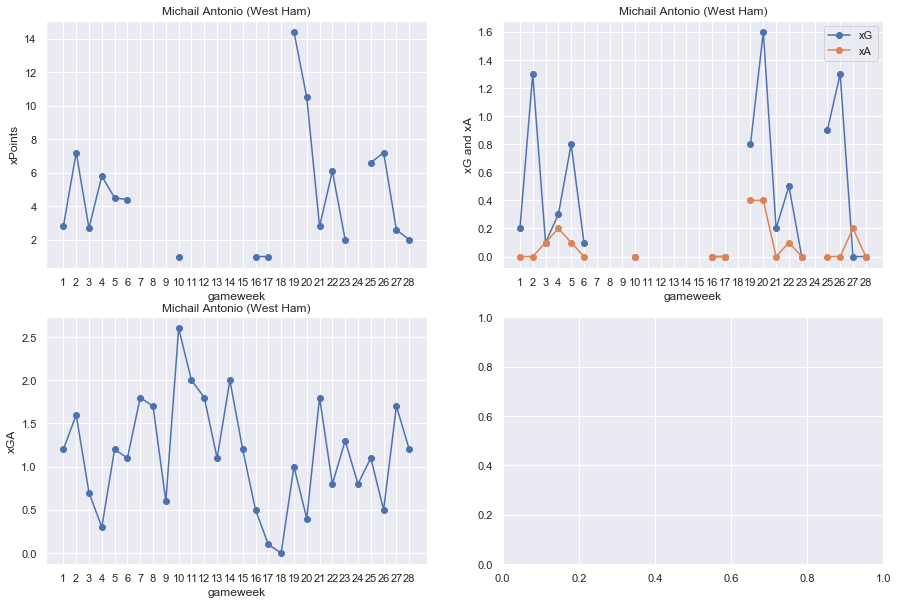

In [14]:
# find player index
name_string = 'Antonio'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound)
# plot xPoints over time
ix = playersFound.index[0]
#ix = 235

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [15]:
# find player index
df.loc[df['web_name'].str.contains('De '),'web_name']

id
272    De Bruyne
Name: web_name, dtype: object

In [16]:
my_starting11 = [12,109,558,277,271,302,272,37,388,202,437] #vardy=224, grealish=37, mane=251
my_subs = [597,461,23,74]

In [17]:
exp_avg = df.loc[my_starting11,'adjusted points per game'].sum() + df.loc[my_starting11,'adjusted points per game'].max()
exp_next = df.loc[my_starting11,'next1_xP'].sum() + df.loc[my_starting11,'next1_xP'].max()

print('STARTING 11')
print('Expected points on average: ' + str(exp_avg))
print('Expected points next gameweek: ' + str(exp_next))
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

STARTING 11
Expected points on average: 63.662976525089796
Expected points next gameweek: 34.9928764462541


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
12,Martínez,Aston Villa,54,27.142857,5.6,4.677707,4.812635,4.655018,4.767280,4.672853,2.012964
109,Rüdiger,Chelsea,46,13.061224,4.9,4.023057,3.964986,4.292631,NaN,4.318377,1.875760
558,Coufal,West Ham,46,23.947368,3.8,3.955881,4.078087,3.962471,3.947537,3.953993,1.844439
277,Cancelo,Manchester City,61,23.018868,5.3,5.325346,4.921592,4.479910,NaN,5.140292,2.156170
271,Gündogan,Manchester City,62,22.903226,6.2,5.489619,5.148810,5.786121,NaN,5.492054,2.204684
302,Fernandes,Manchester Utd,115,29.027778,7.2,6.487526,5.717511,6.126737,NaN,6.502857,1.913067
272,De Bruyne,Manchester City,119,23.148148,5.4,6.361159,4.835461,4.782176,NaN,6.382885,1.844008
37,Grealish,Aston Villa,75,21.864407,5.9,5.122349,1.701897,3.859900,5.063035,5.072675,1.870417
388,Kane,Tottenham,115,25.915493,7.1,6.345253,5.669984,5.713323,6.044334,6.194636,1.871113



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
597,Sánchez,Brighton,45,17.105263,3.8,3.847569,4.109619,4.724884,4.447967,3.925189,1.813761
461,Saïss,Wolves,49,20.000000,4.0,3.862753,3.360373,3.172207,NaN,4.308785,1.745014
23,Smith Rowe,Arsenal,42,12.857143,3.5,3.437112,2.785702,3.038429,3.215911,3.485886,1.677139
74,White,Brighton,44,26.785714,2.8,3.201579,4.029619,4.454884,3.819387,3.272667,1.526293


## Save data

In [18]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)